In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter
from scipy import stats
from sklearn.neighbors import LocalOutlierFactor
import scipy.spatial.distance
from scipy.special import erf
import math

import seaborn as sns

# Combined the data

In [ ]:
# Define the sensor files and columns
sensor_files = {
    'accelerometer': 'Accelerometer_0.25s.csv',
    'gyroscope': 'Gyroscope_0.25s.csv',
    'linear_accelerometer': 'Linear Accelerometer_0.25s.csv',
    'magnetometer': 'Magnetometer_0.25s.csv'
}

# Load the dataset (specific to files ending with 0.25s.csv)
base_path = '/Users/priyank/Desktop/ML4QS-project/Wave_right_5mins'
folders = [
    'Wave_right_min_1',
    'Wave_right_min_2',
    'Wave_right_min_3',
    'Wave_right_min_4',
    'Wave_right_min_5'
]

def load_and_adjust_timestamps(base_path, folders, filename):
    combined_data = pd.DataFrame()
    for i, folder in enumerate(folders):
        file_path = os.path.join(base_path, folder, filename)
        if file_path.endswith('0.25s.csv'):
            df = pd.read_csv(file_path)
            combined_data = pd.concat([combined_data, df], ignore_index=True)
    
    # Adjust the timestamps to start at 0 and increment by 0.25s
    combined_data['time'] = np.arange(0, 0.25 * len(combined_data), 0.25)
    return combined_data

# Process each sensor file
for sensor_type, filename in sensor_files.items():
    combined_data = load_and_adjust_timestamps(base_path, folders, filename)
    output_path = os.path.join(base_path, f'Combined_{filename}')
    combined_data.to_csv(output_path, index=False)

print("Data concatenation and timestamp adjustment completed.")


First few rows of accelerometer data:
   time  X (m/s^2)  Y (m/s^2)  Z (m/s^2)             label
0  0.00   5.017007   6.993543   4.609175  waving_righthand
1  0.25   6.460841   8.044428   3.990989  waving_righthand
2  0.50   5.651683   6.016588   4.820983  waving_righthand
3  0.75  -9.214508   5.620626  -3.380259  waving_righthand
4  1.00   1.911262   3.707514   2.288208  waving_righthand

Summary statistics of accelerometer data:
              time    X (m/s^2)    Y (m/s^2)    Z (m/s^2)
count  1203.000000  1203.000000  1203.000000  1203.000000
mean    150.250000    -1.453352    -0.510362     2.246457
std      86.855124    11.721227     5.186409     3.974443
min       0.000000   -29.228681   -21.215065    -9.630721
25%      75.125000   -11.678108    -3.394180    -0.552744
50%     150.250000    -1.295586     0.300671     2.121233
75%     225.375000     9.191564     2.847418     4.838661
max     300.500000    30.706994    10.407228    13.981417

Missing values in accelerometer data:
tim

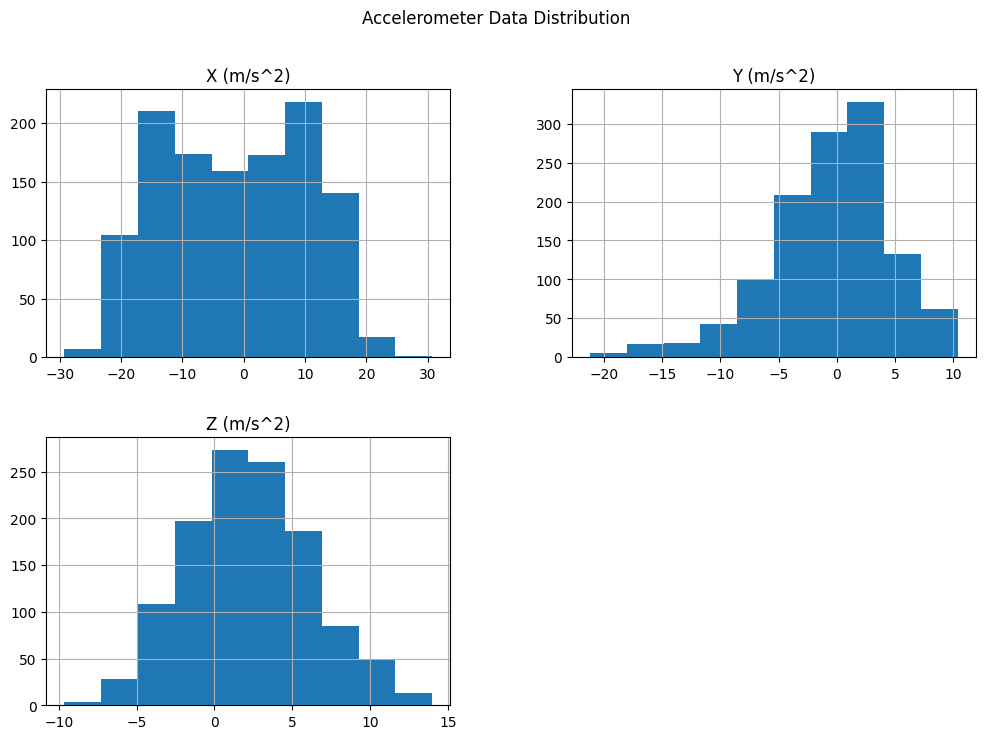

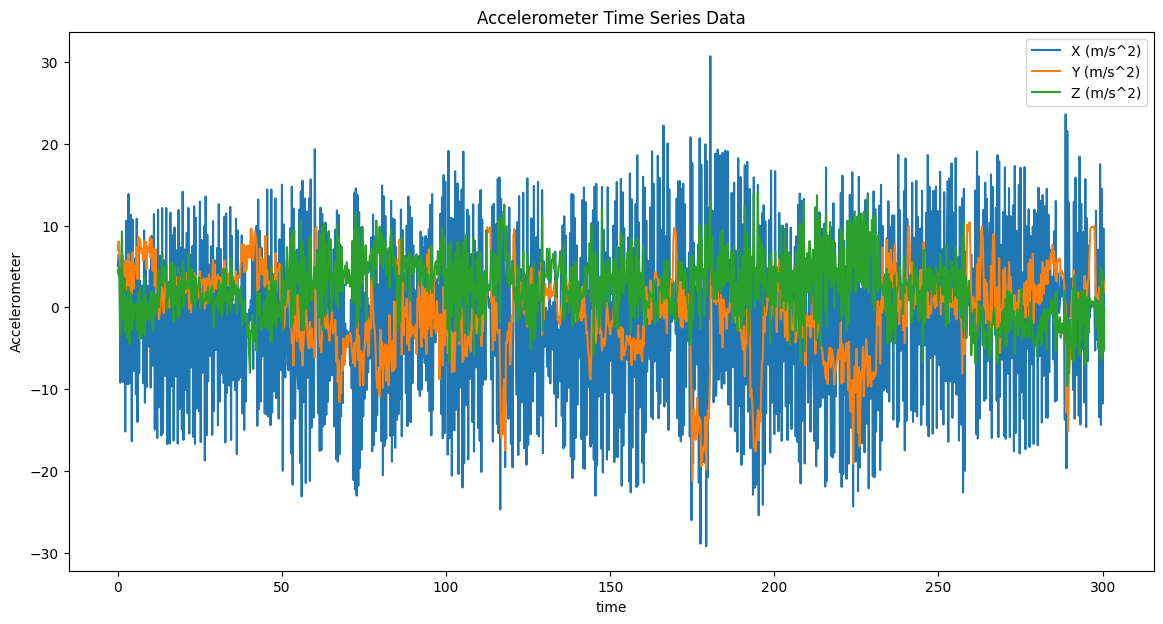

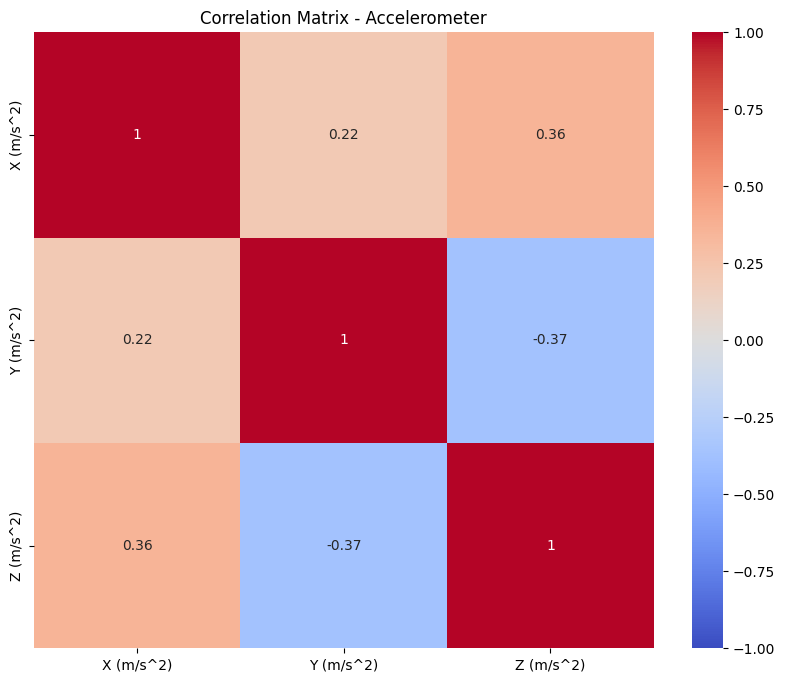


First few rows of gyroscope data:
   time  X (rad/s)  Y (rad/s)  Z (rad/s)             label
0  0.00  -0.038529   0.053973   0.019888  waving_righthand
1  0.25  -0.088720  -0.862739  -0.216898  waving_righthand
2  0.50   1.281177  -2.336705  -3.360437  waving_righthand
3  0.75   0.937536  -2.343656  -0.580902  waving_righthand
4  1.00  -2.994289   2.008762   5.056659  waving_righthand

Summary statistics of gyroscope data:
              time    X (rad/s)    Y (rad/s)    Z (rad/s)
count  1201.000000  1201.000000  1201.000000  1201.000000
mean    150.000000     0.280012    -0.036217     0.066631
std      86.710786     1.184879     1.161952     4.110825
min       0.000000    -3.271785    -5.203266   -10.182575
25%      75.000000    -0.492632    -0.784451    -3.512119
50%     150.000000     0.196221    -0.042392    -0.061055
75%     225.000000     0.984997     0.666574     3.778822
max     300.000000     4.063844     6.355003    10.325570

Missing values in gyroscope data:
time         0


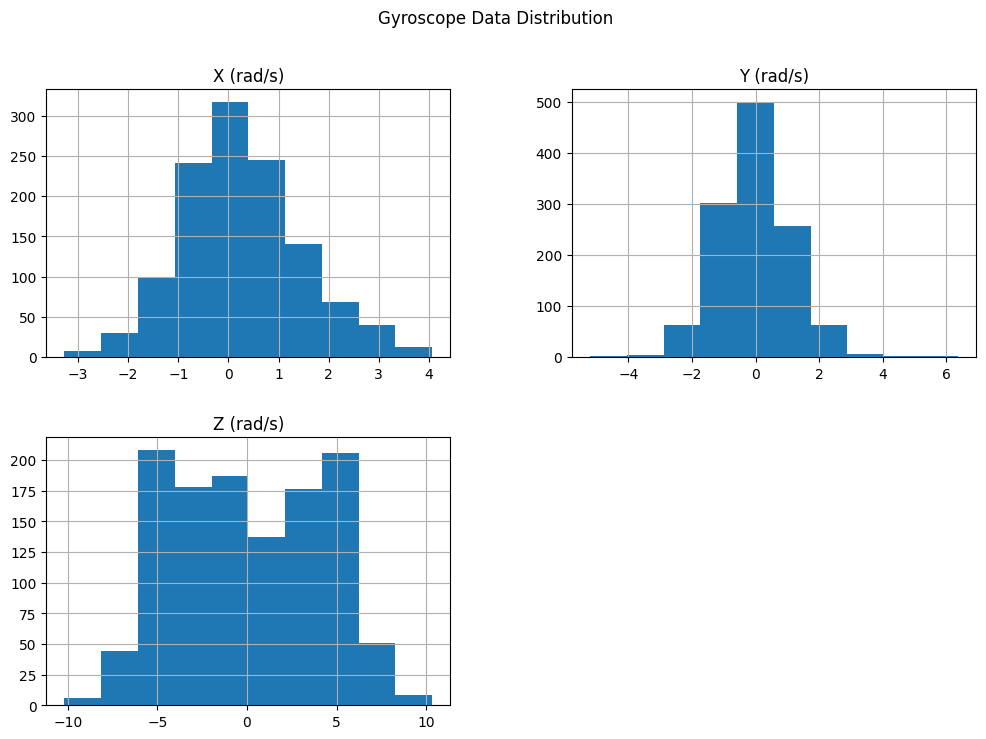

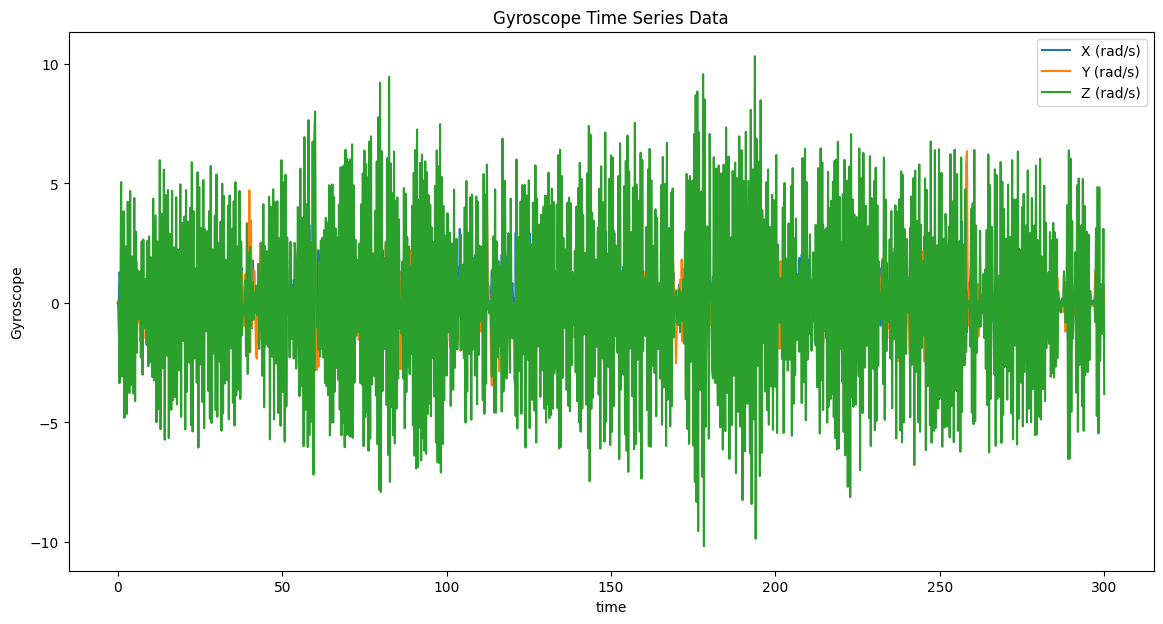

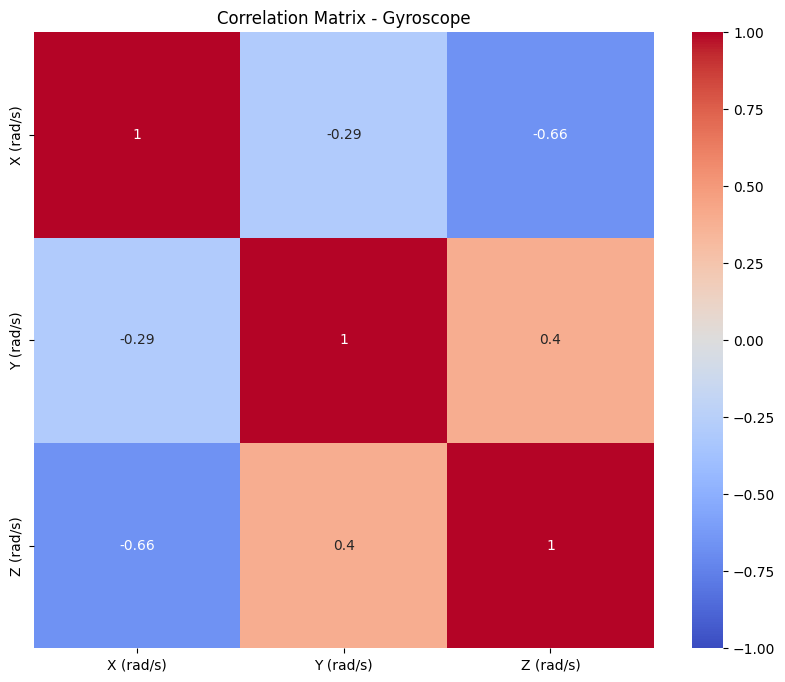


First few rows of linear_accelerometer data:
   time  X (m/s^2)  Y (m/s^2)  Z (m/s^2)             label
0  0.00   0.018473   0.004278  -0.086875  waving_righthand
1  0.25   1.446126   1.131561  -0.457731  waving_righthand
2  0.50   1.897249  -2.923306   3.368973  waving_righthand
3  0.75  -5.421172  -3.058962  -1.792855  waving_righthand
4  1.00   0.765324  -4.781332   0.565631  waving_righthand

Summary statistics of linear_accelerometer data:
              time    X (m/s^2)    Y (m/s^2)    Z (m/s^2)
count  1201.000000  1201.000000  1201.000000  1201.000000
mean    150.000000     0.430826    -8.289827     0.741224
std      86.710786     8.755658     4.303773     2.649394
min       0.000000   -20.563647   -27.671566    -7.981358
25%      75.000000    -7.492558   -10.637881    -1.011248
50%     150.000000     0.107773    -7.724764     0.613579
75%     225.000000     8.679530    -5.517039     2.480915
max     300.000000    20.073416     1.254962     9.165926

Missing values in linear_ac

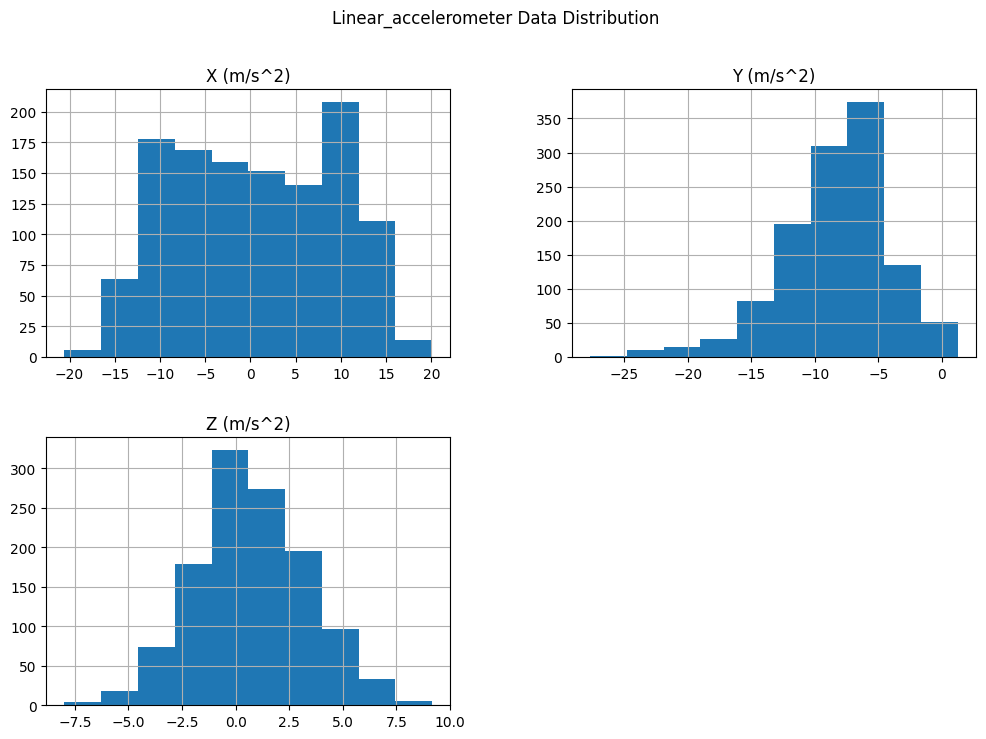

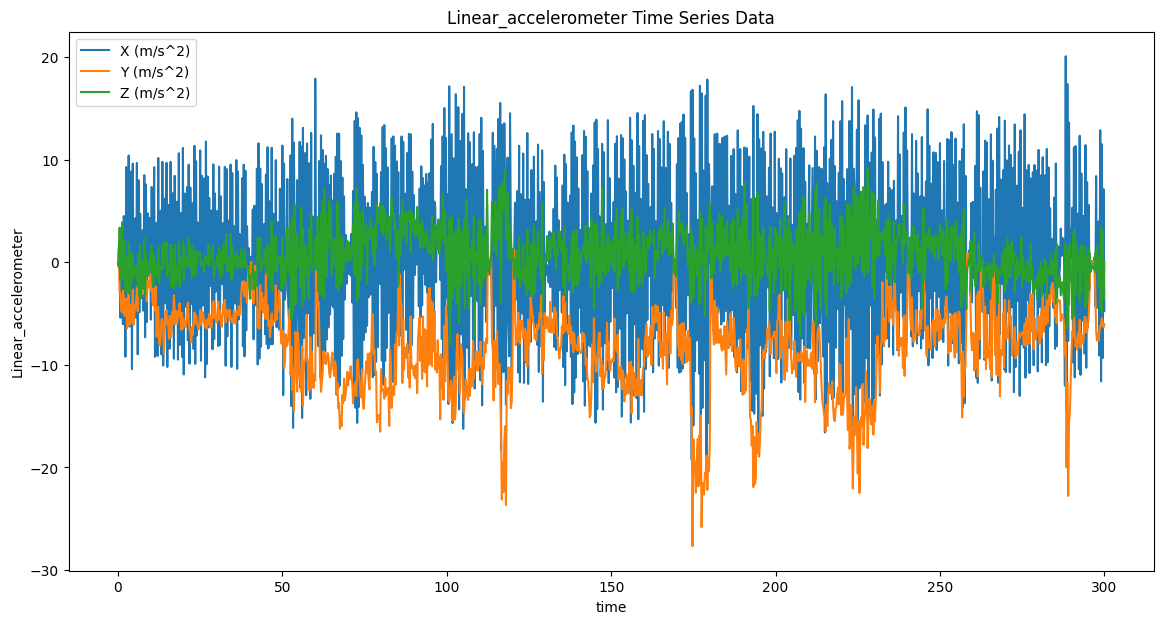

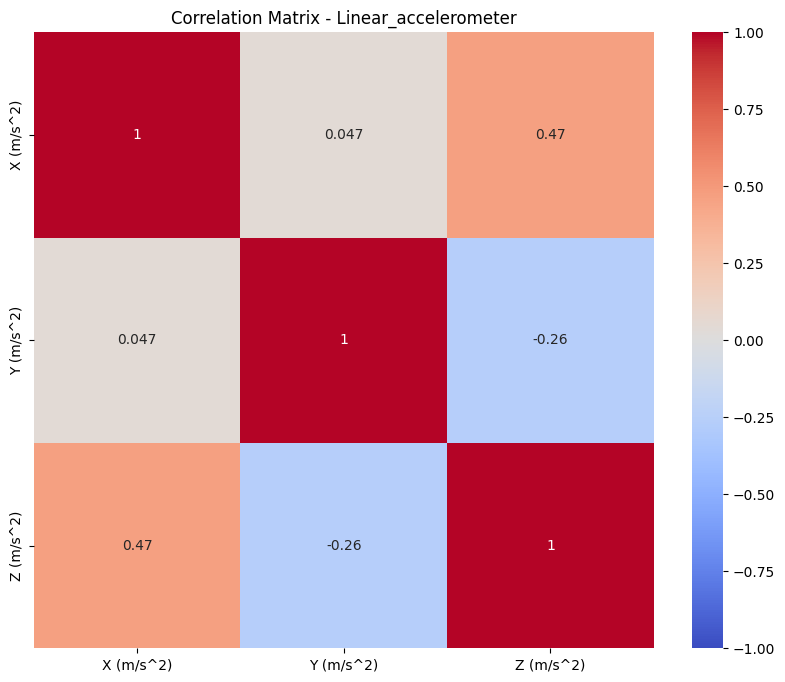


First few rows of magnetometer data:
   time      X (µT)      Y (µT)      Z (µT)             label
0  0.00  240.727609 -929.616967  613.527074  waving_righthand
1  0.25  240.962214 -929.332268  614.902009  waving_righthand
2  0.50  259.898762 -929.111047  624.742263  waving_righthand
3  0.75  293.634390 -918.317686  624.849758  waving_righthand
4  1.00  281.449910 -923.674460  610.221858  waving_righthand

Summary statistics of magnetometer data:
              time       X (µT)       Y (µT)       Z (µT)
count  1201.000000  1201.000000  1201.000000  1201.000000
mean    150.000000    61.218530  -176.174429    94.417375
std      86.710786   102.770869   334.680363   228.308152
min       0.000000   -34.068956  -929.616967   -32.837623
25%      75.000000    11.216352   -35.274569   -19.721357
50%     150.000000    22.775408   -28.165685    -8.443002
75%     225.000000    32.849509   -21.713684    19.283893
max     300.000000   305.043143    11.782269   631.872615

Missing values in magneto

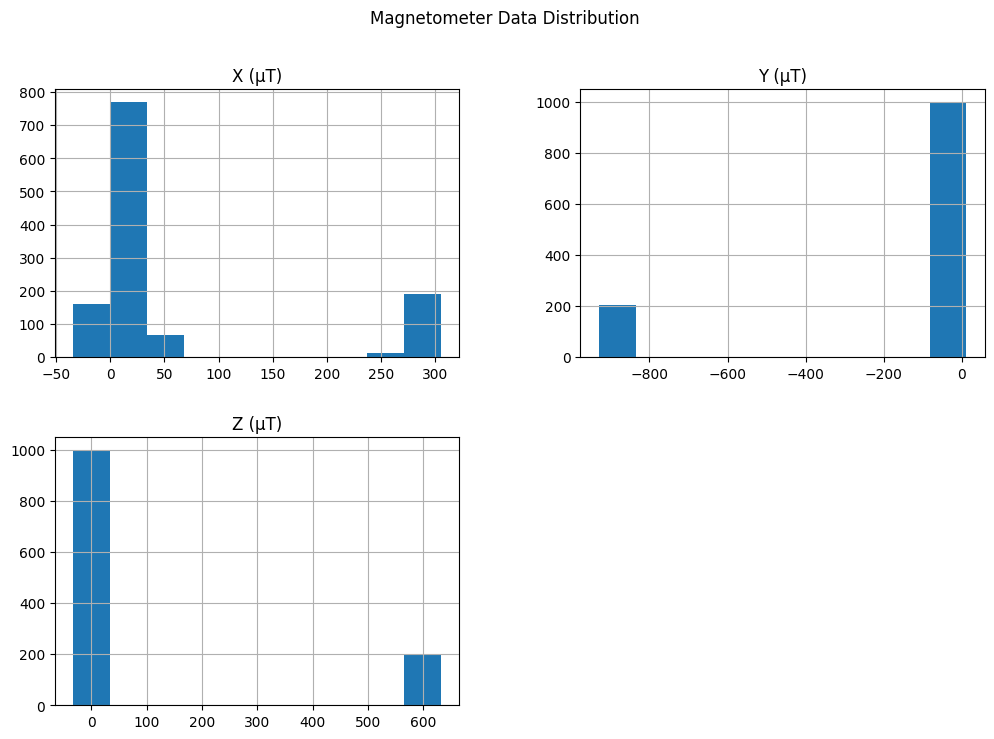

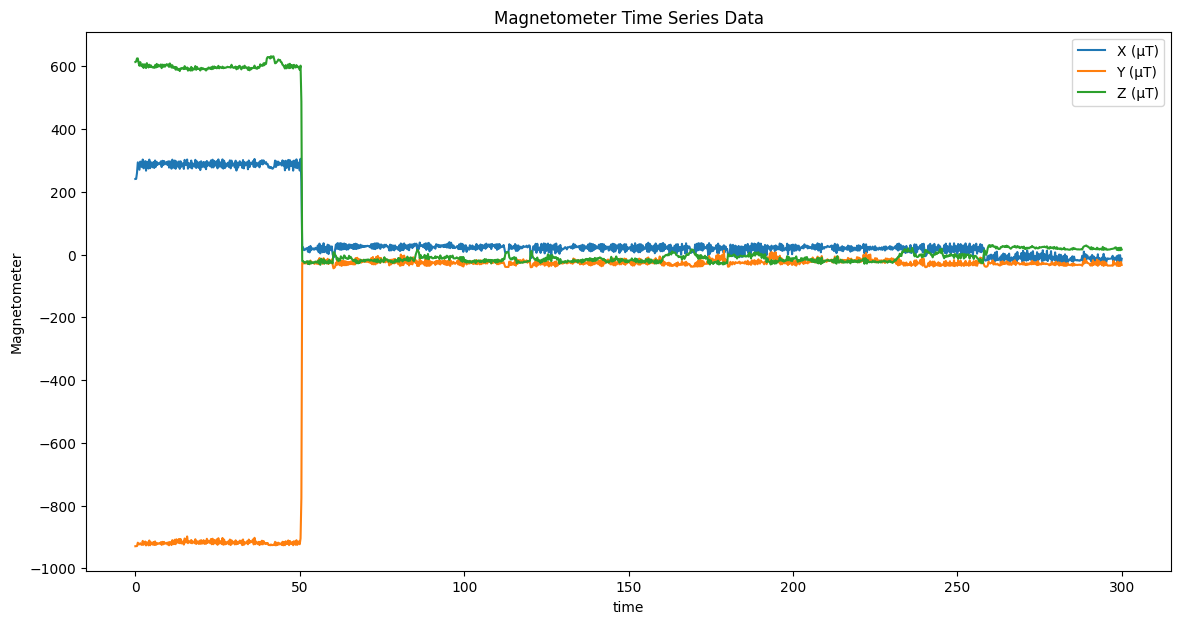

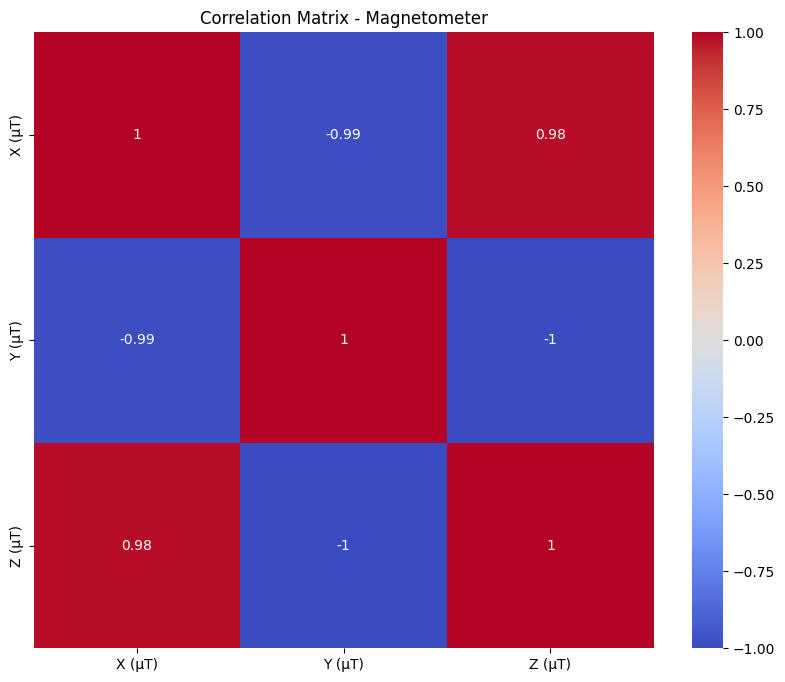

EDA completed.


In [2]:
# Define the sensor files and columns
sensor_files = {
    'accelerometer': 'Combined_Accelerometer_0.25s.csv',
    'gyroscope': 'Combined_Gyroscope_0.25s.csv',
    'linear_accelerometer': 'Combined_Linear Accelerometer_0.25s.csv',
    'magnetometer': 'Combined_Magnetometer_0.25s.csv'
}

sensor_columns = {
    'accelerometer': ['X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)'],
    'gyroscope': ['X (rad/s)', 'Y (rad/s)', 'Z (rad/s)'],
    'linear_accelerometer': ['X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)'],
    'magnetometer': ['X (µT)', 'Y (µT)', 'Z (µT)']
}

# Define the base path
base_path = '/Users/priyank/Desktop/ML4QS-project/Wave_right_5mins/Combined Data'

def perform_eda(filename, sensor_type, cols):
    file_path = os.path.join(base_path, filename)
    df = pd.read_csv(file_path)

    # Display the first few rows of the data
    print(f"\nFirst few rows of {sensor_type} data:")
    print(df.head())

    # Display summary statistics
    print(f"\nSummary statistics of {sensor_type} data:")
    print(df.describe())

    # Check for missing values
    print(f"\nMissing values in {sensor_type} data:")
    print(df.isnull().sum())

    # Plot histograms for each sensor column
    df[cols].hist(figsize=(12, 8))
    plt.suptitle(f'{sensor_type.capitalize()} Data Distribution')
    plt.show()

    # Plot time series for each sensor column
    plt.figure(figsize=(14, 7))
    for col in cols:
        plt.plot(df['time'], df[col], label=col)
    plt.title(f'{sensor_type.capitalize()} Time Series Data')
    plt.xlabel('time')
    plt.ylabel(sensor_type.capitalize())
    plt.legend()
    plt.show()

    # Compute and visualize the correlation matrix
    corr_matrix = df[cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix - {sensor_type.capitalize()}')
    plt.show()

# Perform EDA on each combined file
for sensor_type, filename in sensor_files.items():
    cols = sensor_columns[sensor_type]
    perform_eda(filename, sensor_type, cols)

print("EDA completed.")


# Normality Check

Accelerometer Data Normality Check:


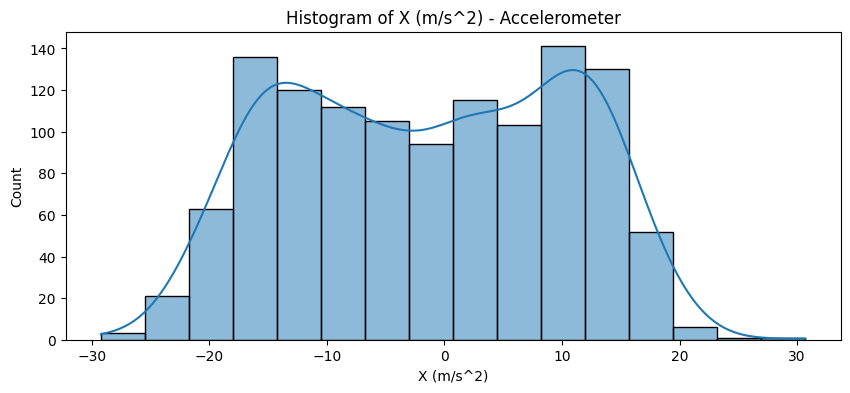

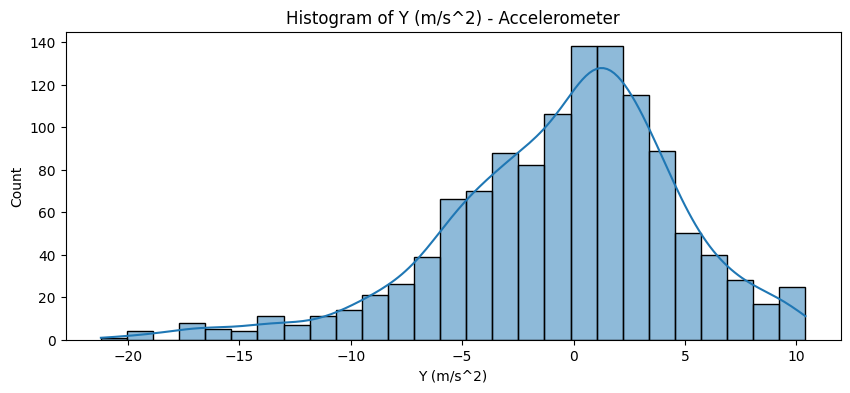

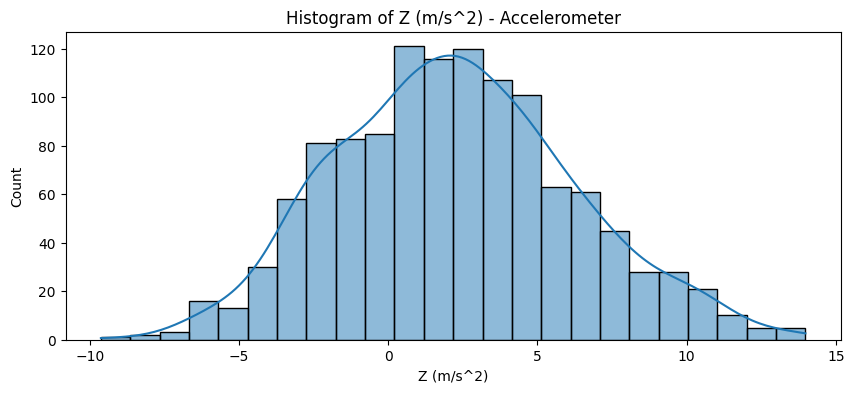

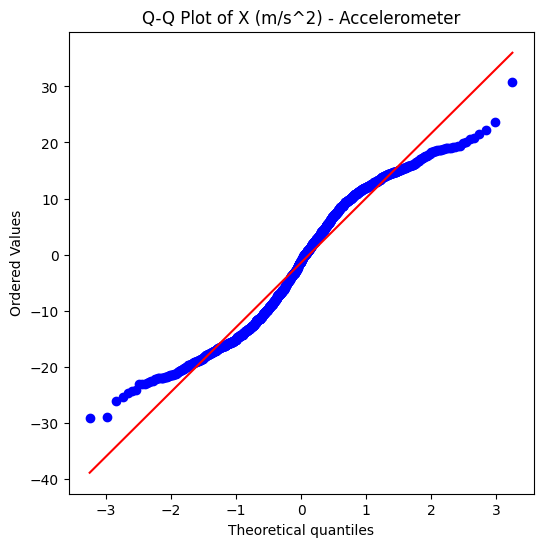

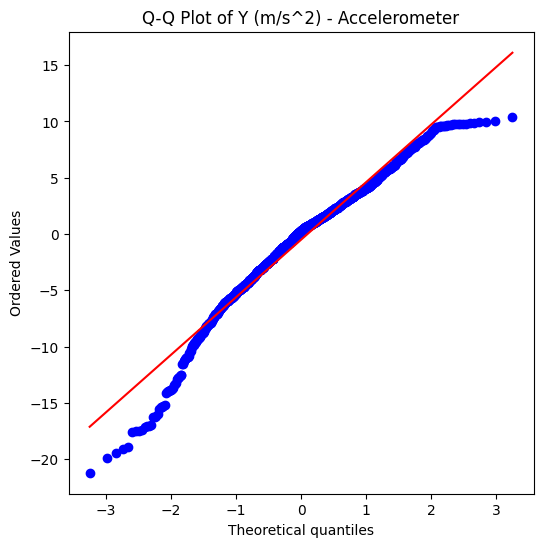

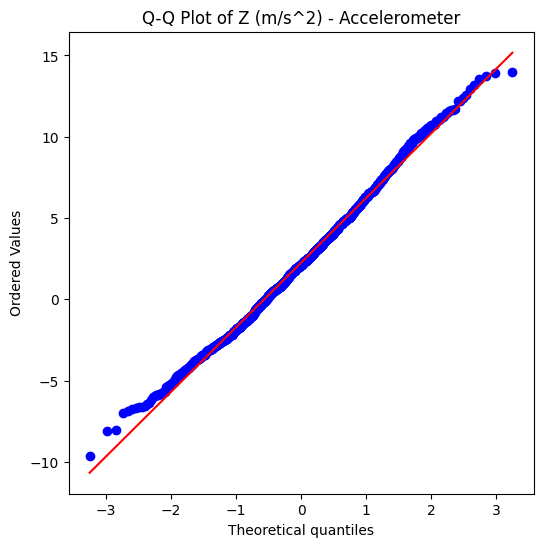

Shapiro-Wilk Test for X (m/s^2) - Accelerometer: Statistics=9.623e-01, p=4.218e-17
X (m/s^2) - Accelerometer does not look Gaussian (reject H0)
Shapiro-Wilk Test for Y (m/s^2) - Accelerometer: Statistics=9.680e-01, p=1.188e-15
Y (m/s^2) - Accelerometer does not look Gaussian (reject H0)
Shapiro-Wilk Test for Z (m/s^2) - Accelerometer: Statistics=9.957e-01, p=1.804e-03
Z (m/s^2) - Accelerometer does not look Gaussian (reject H0)

Gyroscope Data Normality Check:


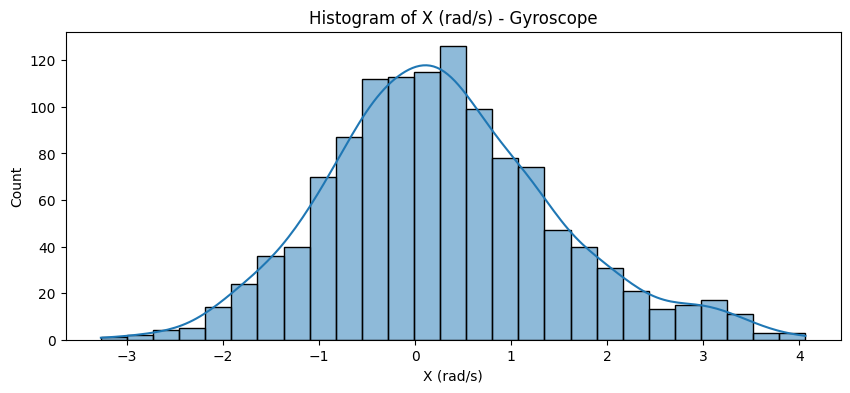

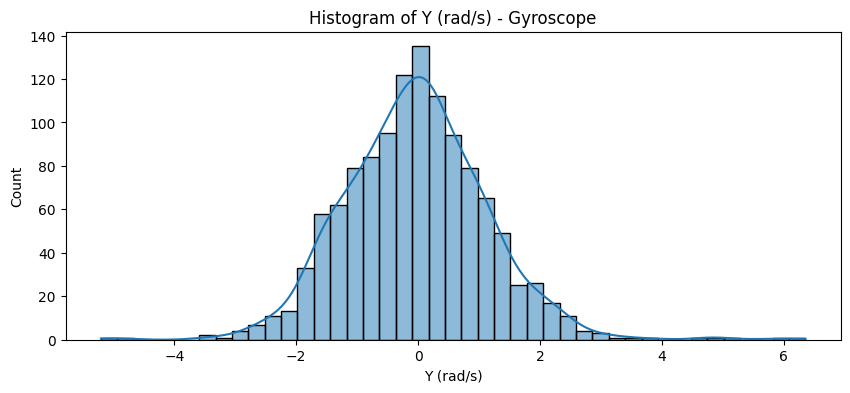

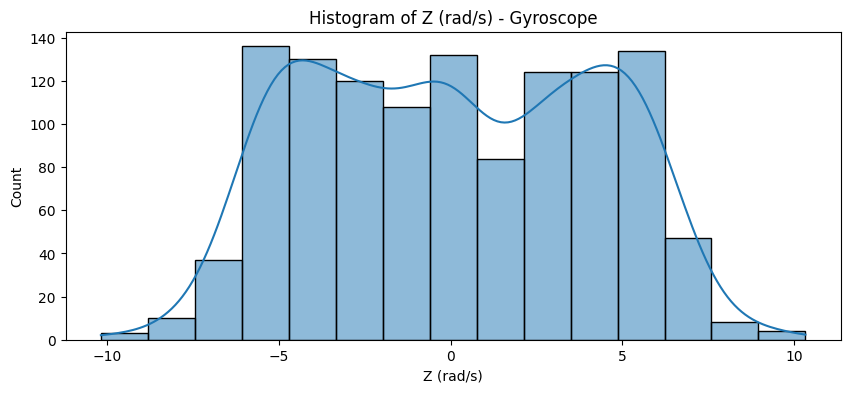

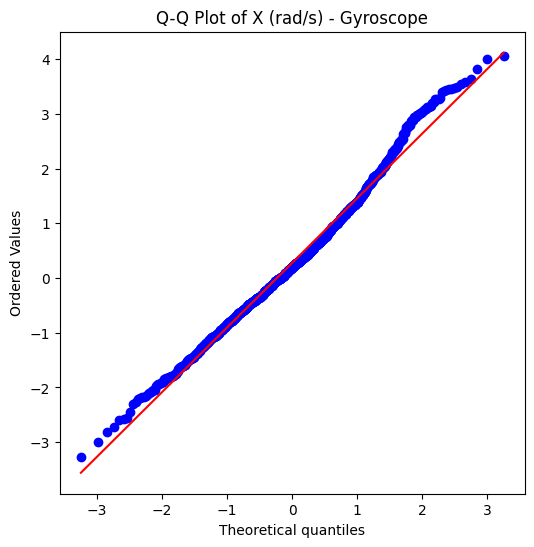

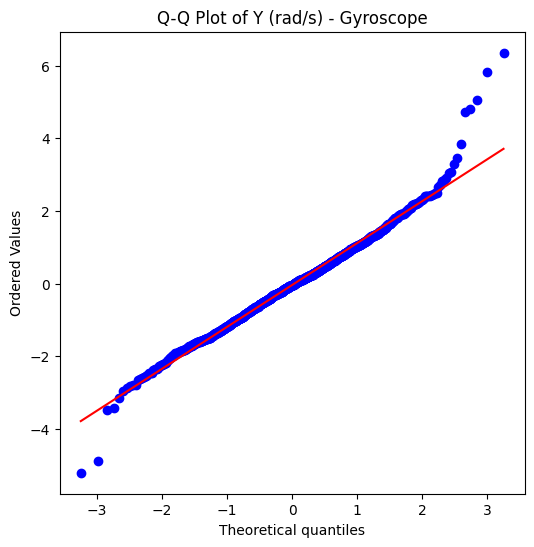

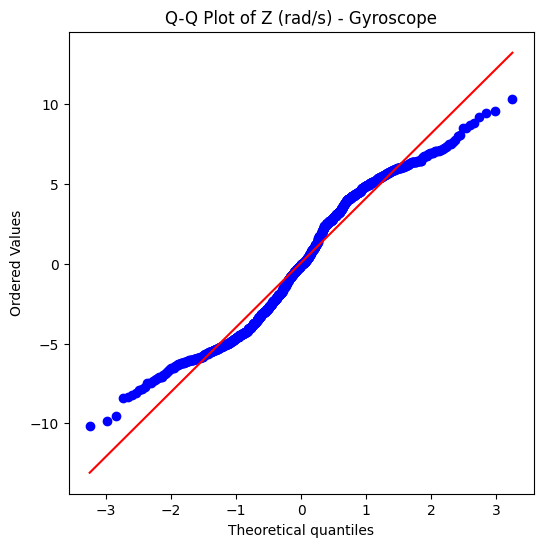

Shapiro-Wilk Test for X (rad/s) - Gyroscope: Statistics=9.899e-01, p=2.331e-07
X (rad/s) - Gyroscope does not look Gaussian (reject H0)
Shapiro-Wilk Test for Y (rad/s) - Gyroscope: Statistics=9.821e-01, p=5.328e-11
Y (rad/s) - Gyroscope does not look Gaussian (reject H0)
Shapiro-Wilk Test for Z (rad/s) - Gyroscope: Statistics=9.655e-01, p=2.821e-16
Z (rad/s) - Gyroscope does not look Gaussian (reject H0)

Linear Accelerometer Data Normality Check:


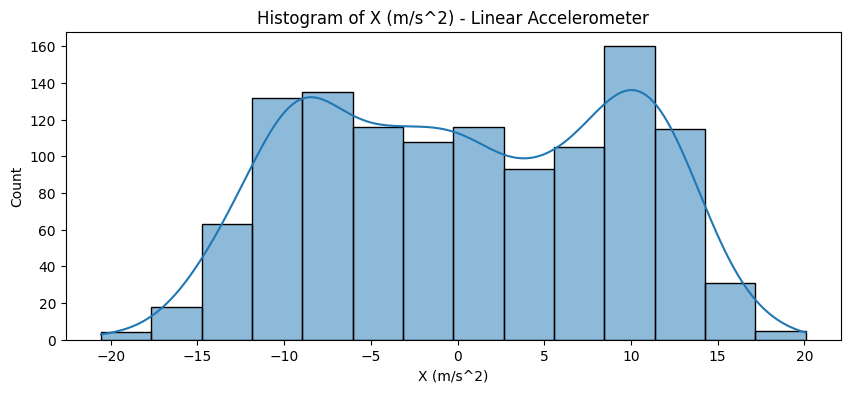

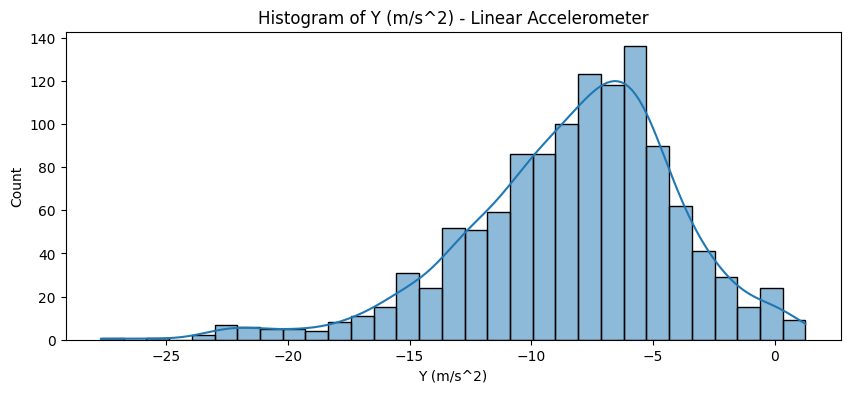

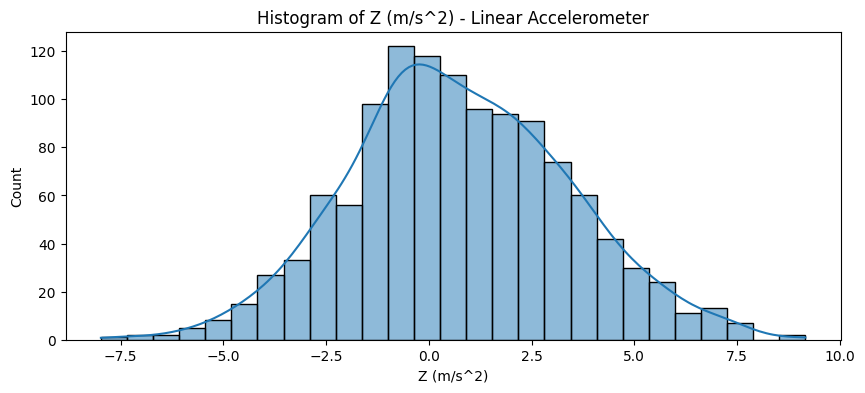

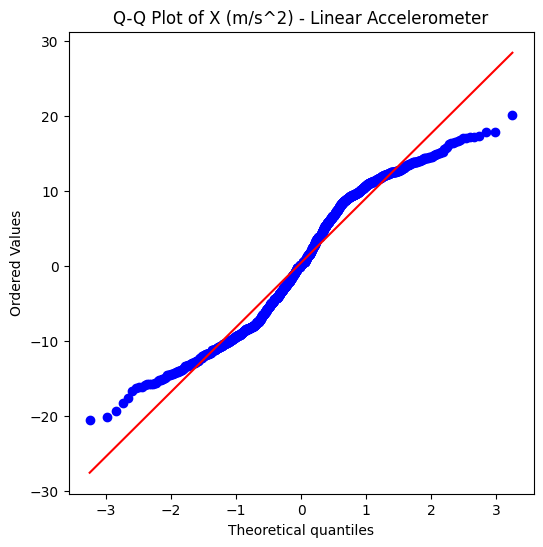

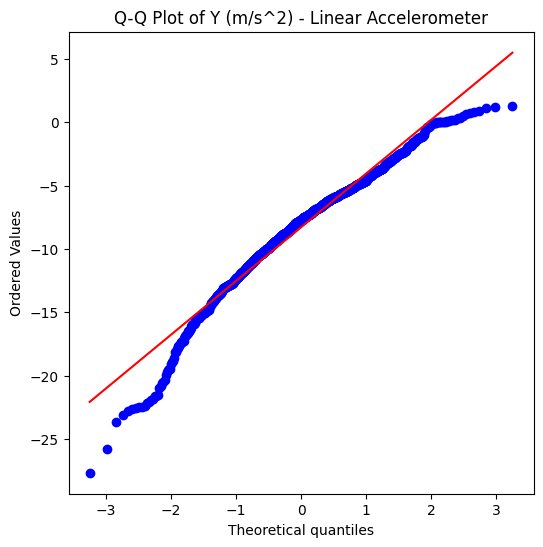

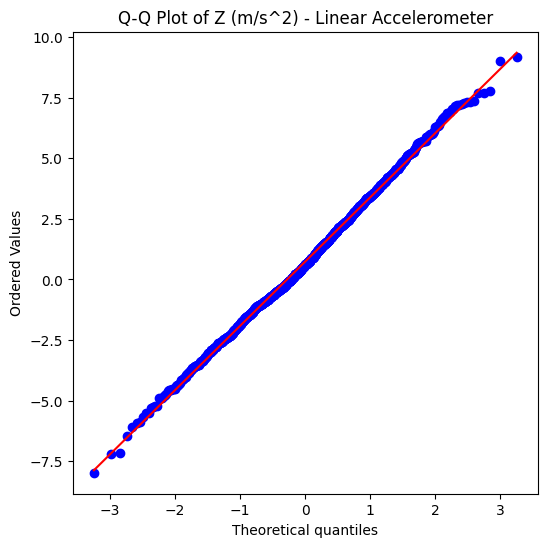

Shapiro-Wilk Test for X (m/s^2) - Linear Accelerometer: Statistics=9.609e-01, p=2.042e-17
X (m/s^2) - Linear Accelerometer does not look Gaussian (reject H0)
Shapiro-Wilk Test for Y (m/s^2) - Linear Accelerometer: Statistics=9.682e-01, p=1.437e-15
Y (m/s^2) - Linear Accelerometer does not look Gaussian (reject H0)
Shapiro-Wilk Test for Z (m/s^2) - Linear Accelerometer: Statistics=9.981e-01, p=1.954e-01
Z (m/s^2) - Linear Accelerometer looks Gaussian (fail to reject H0)

Magnetometer Data Normality Check:


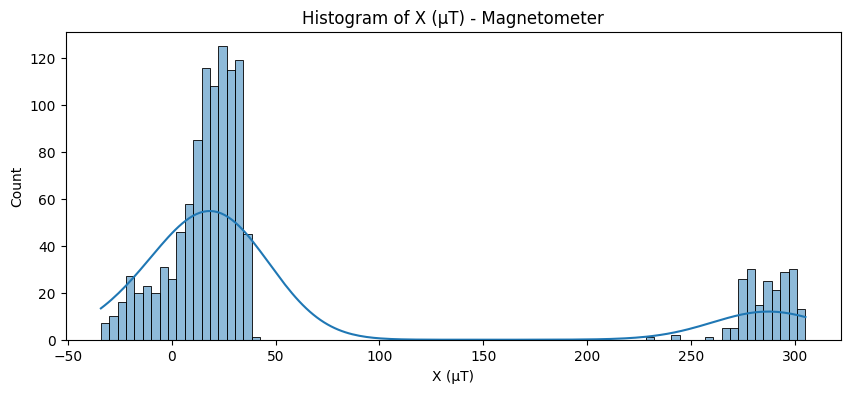

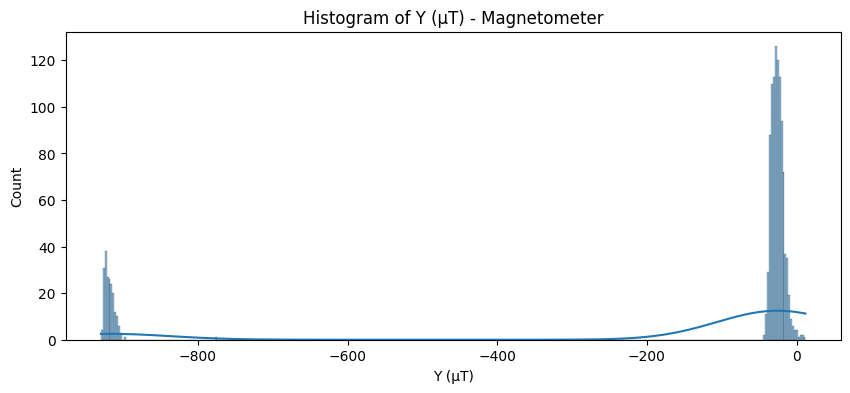

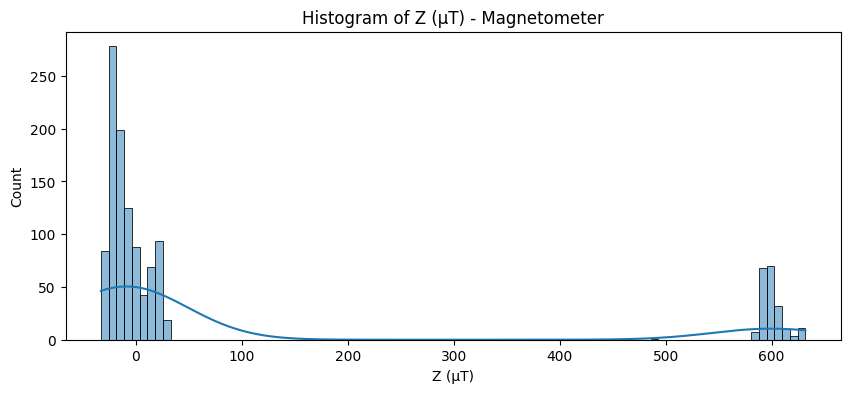

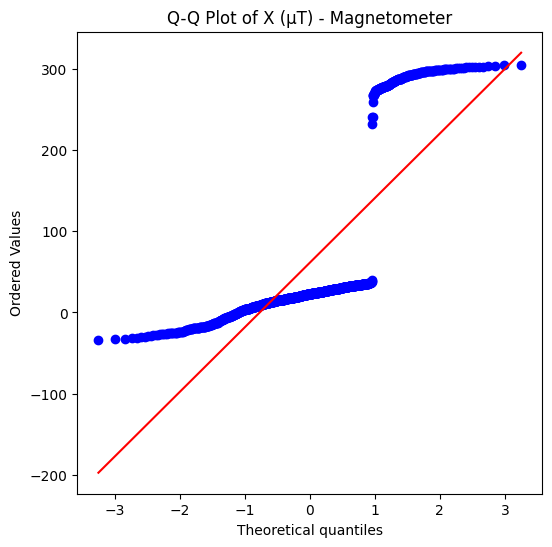

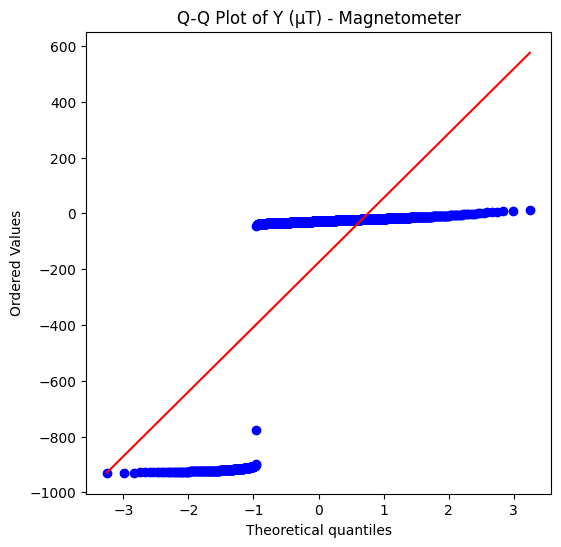

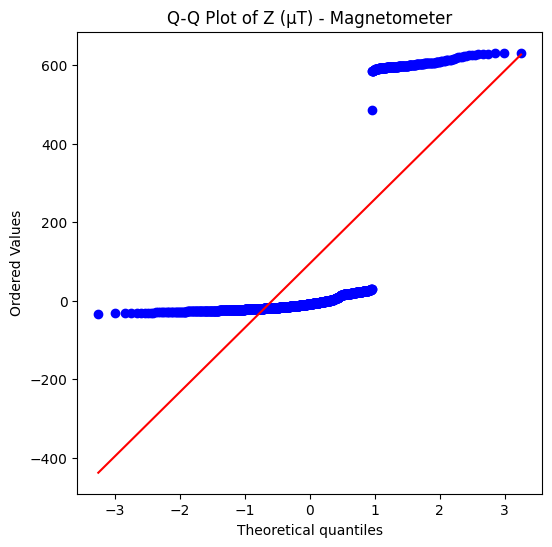

Shapiro-Wilk Test for X (µT) - Magnetometer: Statistics=5.973e-01, p=0.000e+00
X (µT) - Magnetometer does not look Gaussian (reject H0)
Shapiro-Wilk Test for Y (µT) - Magnetometer: Statistics=4.755e-01, p=0.000e+00
Y (µT) - Magnetometer does not look Gaussian (reject H0)
Shapiro-Wilk Test for Z (µT) - Magnetometer: Statistics=5.129e-01, p=0.000e+00
Z (µT) - Magnetometer does not look Gaussian (reject H0)


In [4]:

base_path = '/Users/priyank/Desktop/ML4QS-project/Wave_right_5mins'
folders = [
'Combined Data']

def agg_data(base_path, folders, filename):
    data_frames = []
    for folder in folders:
        file_path = os.path.join(base_path, folder, filename)
        df = pd.read_csv(file_path)
        data_frames.append(df)
    combined_data = pd.concat(data_frames, ignore_index=True)
    return combined_data

# Load the aggregated data
accel_data = agg_data(base_path, folders, 'Combined_Accelerometer_0.25s.csv')
gyro_data = agg_data(base_path, folders, 'Combined_Gyroscope_0.25s.csv')
linear_accel_data = agg_data(base_path, folders, 'Combined_Linear Accelerometer_0.25s.csv')
magnetometer_data = agg_data(base_path, folders, 'Combined_Magnetometer_0.25s.csv')

# Check for normality using visual methods and statistical tests

# Function to plot histograms
def plot_histograms(data, cols, sensor):
    for col in cols:
        plt.figure(figsize=(10, 4))
        sns.histplot(data[col], kde=True)
        plt.title(f'Histogram of {col} - {sensor}')
        plt.show()

# Function to plot Q-Q plots
def plot_qq(data, cols, sensor):
    for col in cols:
        plt.figure(figsize=(6, 6))
        stats.probplot(data[col], dist="norm", plot=plt)
        plt.title(f'Q-Q Plot of {col} - {sensor}')
        plt.show()

# Function to perform Shapiro-Wilk Test
def shapiro_test(data, cols, sensor):
    for col in cols:
        stat, p = stats.shapiro(data[col])
        print(f'Shapiro-Wilk Test for {col} - {sensor}: Statistics={stat:.3e}, p={p:.3e}')
        if p > 0.05:
            print(f'{col} - {sensor} looks Gaussian (fail to reject H0)')
        else:
            print(f'{col} - {sensor} does not look Gaussian (reject H0)')


# Columns to check for normality for each sensor
columns = {
    'accelerometer': ['X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)'],
    'gyroscope': ['X (rad/s)', 'Y (rad/s)', 'Z (rad/s)'],
    'linear_accelerometer': ['X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)'],
    'magnetometer': ['X (µT)', 'Y (µT)', 'Z (µT)']
}

# Perform checks on accelerometer data
print("Accelerometer Data Normality Check:")
plot_histograms(accel_data, columns['accelerometer'], 'Accelerometer')
plot_qq(accel_data, columns['accelerometer'], 'Accelerometer')
shapiro_test(accel_data, columns['accelerometer'], 'Accelerometer')

# Perform checks on gyroscope data
print("\nGyroscope Data Normality Check:")
plot_histograms(gyro_data, columns['gyroscope'], 'Gyroscope')
plot_qq(gyro_data, columns['gyroscope'], 'Gyroscope')
shapiro_test(gyro_data, columns['gyroscope'], 'Gyroscope')

# Perform checks on linear accelerometer data
print("\nLinear Accelerometer Data Normality Check:")
plot_histograms(linear_accel_data, columns['linear_accelerometer'], 'Linear Accelerometer')
plot_qq(linear_accel_data, columns['linear_accelerometer'], 'Linear Accelerometer')
shapiro_test(linear_accel_data, columns['linear_accelerometer'], 'Linear Accelerometer')

# Perform checks on magnetometer data
print("\nMagnetometer Data Normality Check:")
plot_histograms(magnetometer_data, columns['magnetometer'], 'Magnetometer')
plot_qq(magnetometer_data, columns['magnetometer'], 'Magnetometer')
shapiro_test(magnetometer_data, columns['magnetometer'], 'Magnetometer')